# Car Acceptability Multiclass Classification Using DNN (99.42% Accuracy)
#### Kevin Putra Santoso - Departemen Teknologi Informasi - Institut Teknologi Sepuluh Nopember

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/car-acceptability-classification-dataset/car.csv
/kaggle/input/car-acceptability-classification-dataset/car.data


In [40]:
df = pd.read_csv('/kaggle/input/car-acceptability-classification-dataset/car.csv')
df.shape

(1728, 7)

In [41]:
df

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [42]:
for i in df.columns:
    print(f"Fitur {i}")
    print(df[i].value_counts())

Fitur Buying_Price
vhigh    432
high     432
med      432
low      432
Name: Buying_Price, dtype: int64
Fitur Maintenance_Price
vhigh    432
high     432
med      432
low      432
Name: Maintenance_Price, dtype: int64
Fitur No_of_Doors
2        432
3        432
4        432
5more    432
Name: No_of_Doors, dtype: int64
Fitur Person_Capacity
2       576
4       576
more    576
Name: Person_Capacity, dtype: int64
Fitur Size_of_Luggage
small    576
med      576
big      576
Name: Size_of_Luggage, dtype: int64
Fitur Safety
low     576
med     576
high    576
Name: Safety, dtype: int64
Fitur Car_Acceptability
unacc    1210
acc       384
good       69
vgood      65
Name: Car_Acceptability, dtype: int64


In [43]:
for i in df.columns:
    df = pd.concat([df, pd.get_dummies(df[i], prefix=f"{i}")], axis=1)
    df.drop(columns=i, inplace=True)

In [44]:
df

,Buying_Price_high,Buying_Price_low,Buying_Price_med,Buying_Price_vhigh,Maintenance_Price_high,Maintenance_Price_low,Maintenance_Price_med,Maintenance_Price_vhigh,No_of_Doors_2,No_of_Doors_3,...,Size_of_Luggage_big,Size_of_Luggage_med,Size_of_Luggage_small,Safety_high,Safety_low,Safety_med,Car_Acceptability_acc,Car_Acceptability_good,Car_Acceptability_unacc,Car_Acceptability_vgood
0,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1724,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


<AxesSubplot: >

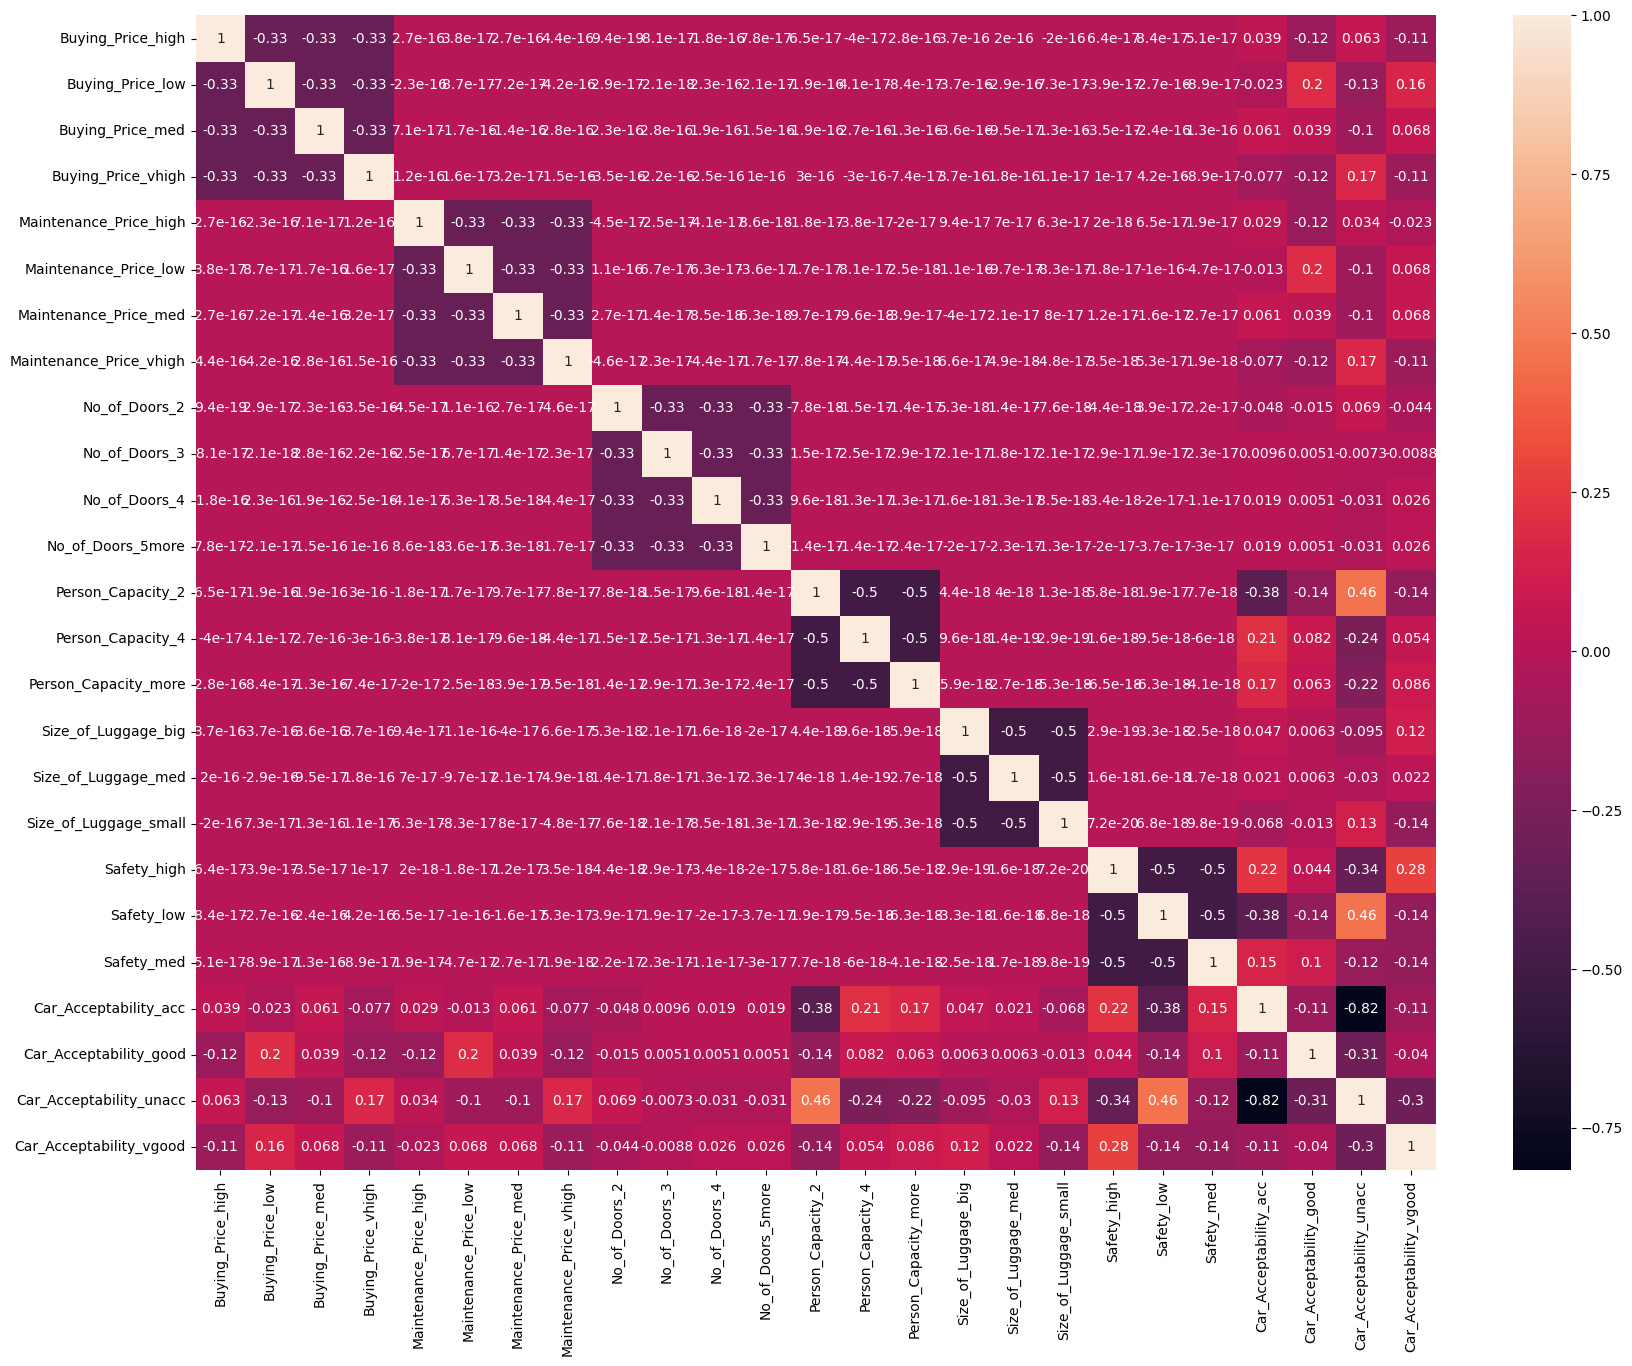

In [80]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

In [81]:
X = df[df.columns[:-4]]
y = df[df.columns[-4:]]

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'] 
)

cp = ModelCheckpoint('model/', save_best_only=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64,
    callbacks=[cp]
)

Epoch 1/100
22/22 [==============================] - 8s 95ms/step - loss: 1.0006 - accuracy: 0.6628 - val_loss: 0.7738 - val_accuracy: 0.6792
Epoch 2/100
22/22 [==============================] - 2s 71ms/step - loss: 0.7432 - accuracy: 0.7033 - val_loss: 0.6267 - val_accuracy: 0.6792
Epoch 3/100
22/22 [==============================] - 2s 71ms/step - loss: 0.6146 - accuracy: 0.7113 - val_loss: 0.4719 - val_accuracy: 0.7630
Epoch 4/100
22/22 [==============================] - 2s 109ms/step - loss: 0.5080 - accuracy: 0.7764 - val_loss: 0.3928 - val_accuracy: 0.8699
Epoch 5/100
22/22 [==============================] - 2s 73ms/step - loss: 0.4542 - accuracy: 0.8155 - val_loss: 0.3560 - val_accuracy: 0.8815
Epoch 6/100
22/22 [==============================] - 2s 72ms/step - loss: 0.3898 - accuracy: 0.8408 - val_loss: 0.3178 - val_accuracy: 0.8786
Epoch 7/100
22/22 [==============================] - 2s 92ms/step - loss: 0.3742 - accuracy: 0.8444 - val_loss: 0.3046 - val_accuracy: 0.8671
Epoch

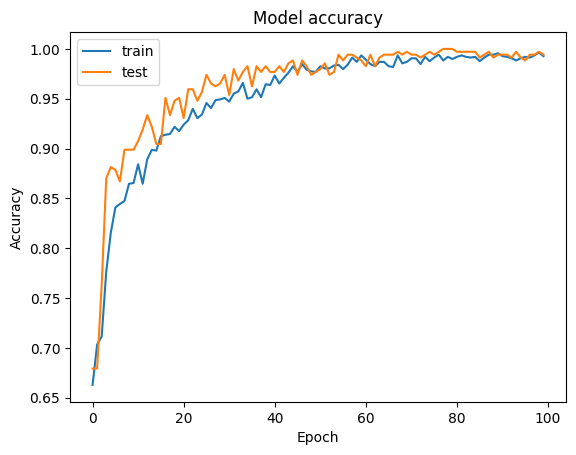

In [139]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [85]:
y_pred = model.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [89]:
y_test

,Car_Acceptability_acc,Car_Acceptability_good,Car_Acceptability_unacc,Car_Acceptability_vgood
599,0,0,1,0
1201,1,0,0,0
628,0,0,1,0
1498,1,0,0,0
1263,0,0,1,0
...,...,...,...,...
100,0,0,1,0
274,0,0,1,0
1206,0,0,1,0
101,0,0,1,0


In [90]:
y_pred = pd.DataFrame(y_pred, columns=list(y_test.columns))

In [129]:
y_test_list = []
y_pred_list = []

for i in range(len(y_pred)):
    y_test_list.append(y_test.columns[np.argmax(y_test.iloc[i])])
    y_pred_list.append(y_pred.columns[np.argmax(y_pred.iloc[i])])

                         precision    recall  f1-score   support

  Car_Acceptability_acc     0.9881    1.0000    0.9940        83
 Car_Acceptability_good     0.9167    1.0000    0.9565        11
Car_Acceptability_unacc     1.0000    1.0000    1.0000       235
Car_Acceptability_vgood     1.0000    0.8824    0.9375        17

               accuracy                         0.9942       346
              macro avg     0.9762    0.9706    0.9720       346
           weighted avg     0.9945    0.9942    0.9941       346



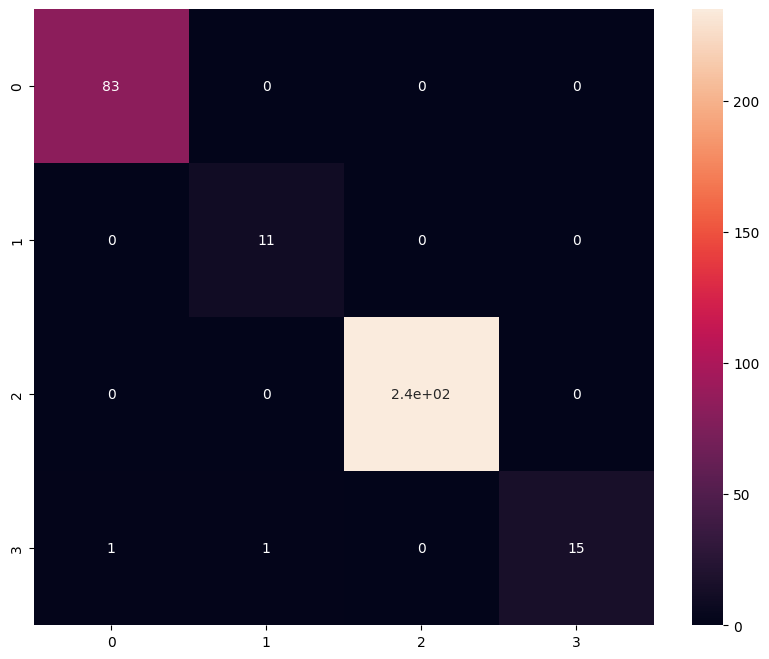

In [153]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_list, y_pred_list, digits=4))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test_list, y_pred_list), annot=True)
plt.show()